In [1]:
import gym
from gym.wrappers import Monitor
import itertools
import numpy as np
import os
import random
import sys
import psutil
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from SERI import StateProcessor, Estimator, ModelParametersCopier, make_epsilon_greedy_policy, deep_q_learning

from reinforcementlearning.lib import plotting
from collections import deque, namedtuple

env = gym.envs.make("Breakout-v0")

VALID_ACTIONS = [0, 1, 2, 3]

# training
tf.reset_default_graph()

# Where we save our checkpoints and graphs
experiment_dir = os.path.abspath("./experiments_seri2/{}".format(env.spec.id))

# Create a glboal step variable
global_step = tf.Variable(0, name='global_step', trainable=False)

# Create estimators
q_estimator = Estimator(scope="q_estimator", summaries_dir=experiment_dir)
target_estimator = Estimator(scope="target_q")

# State processor
state_processor = StateProcessor()

results = []

# Run it!
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t, stats in deep_q_learning(sess,
                                    env,
                                    q_estimator=q_estimator,
                                    target_estimator=target_estimator,
                                    state_processor=state_processor,
                                    experiment_dir=experiment_dir,
                                    num_episodes=10000,
                                    replay_memory_size=500000,
                                    replay_memory_init_size=200000,
                                    update_target_estimator_every=10000,
                                    epsilon_start=1.0,
                                    epsilon_end=0.1,
                                    epsilon_decay_steps=500000,
                                    discount_factor=0.99,
                                    batch_size=40,
                                    ser_coef=32):
        results.append(stats.episode_rewards[-1])
        print("\nEpisode Reward: {}".format(stats.episode_rewards[-1]))




Instructions for updating:
Use `tf.cast` instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please switch to tf.train.get_global_step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor







Populating replay memory...
Mean reward in replay buffer: 1.4450063211125157 STD: 1.3922742413946803
Target mean reward: 4.230554803901876
Secondary experience collection...
Last reward: 2.0
Mean reward in replay buffer: 1.4468354430379746 STD: 1.392204936

Last reward: 1.0
Mean reward in replay buffer: 1.5569948186528497 STD: 1.378213014310047
Last reward: 0.0
Mean reward in replay buffer: 1.5569948186528497 STD: 1.378213014310047
Last reward: 0.0
Mean reward in replay buffer: 1.5569948186528497 STD: 1.378213014310047
Last reward: 0.0
Mean reward in replay buffer: 1.5569948186528497 STD: 1.378213014310047
Last reward: 0.0
Mean reward in replay buffer: 1.5569948186528497 STD: 1.378213014310047
Last reward: 2.0
Mean reward in replay buffer: 1.5595854922279793 STD: 1.3771618154136245
Last reward: 1.0
Mean reward in replay buffer: 1.562905317769131 STD: 1.3759054124505237
Last reward: 4.0
Mean reward in replay buffer: 1.57012987012987 STD: 1.3772784583745052
Last reward: 1.0
Mean reward in replay buffer: 1.5714285714285714 STD: 1.3762670854416297
Last reward: 1.0
Mean reward in replay buffer: 1.5747724317295189 STD: 1.3749766026302657
Last reward: 3.0
Mean reward in replay buffer: 1.5807291666666667 STD: 1.37447147204528
Last reward: 0.0
Mea

Last reward: 3.0
Mean reward in replay buffer: 1.8237704918032787 STD: 1.3202963609620615
Last reward: 0.0
Mean reward in replay buffer: 1.8237704918032787 STD: 1.3202963609620615
Last reward: 3.0
Mean reward in replay buffer: 1.8303693570451436 STD: 1.318449587751949
Last reward: 0.0
Mean reward in replay buffer: 1.8303693570451436 STD: 1.318449587751949
Last reward: 0.0
Mean reward in replay buffer: 1.8303693570451436 STD: 1.318449587751949
Last reward: 0.0
Mean reward in replay buffer: 1.8303693570451436 STD: 1.318449587751949
Last reward: 1.0
Mean reward in replay buffer: 1.8317373461012312 STD: 1.3170659034126293
Last reward: 0.0
Mean reward in replay buffer: 1.8317373461012312 STD: 1.3170659034126293
Last reward: 1.0
Mean reward in replay buffer: 1.8356164383561644 STD: 1.3148273200254244
Last reward: 0.0
Mean reward in replay buffer: 1.8356164383561644 STD: 1.3148273200254244
Last reward: 1.0
Mean reward in replay buffer: 1.836986301369863 STD: 1.3134324344088737
Last reward: 3.

Last reward: 1.0
Mean reward in replay buffer: 2.0746054519368724 STD: 1.1878942276649294
Last reward: 1.0
Mean reward in replay buffer: 2.0746054519368724 STD: 1.1878942276649294
Last reward: 1.0
Mean reward in replay buffer: 2.0746054519368724 STD: 1.1878942276649294
Last reward: 2.0
Mean reward in replay buffer: 2.0775862068965516 STD: 1.187349593551065
Last reward: 0.0
Mean reward in replay buffer: 2.0746054519368724 STD: 1.1891031323388437
Last reward: 2.0
Mean reward in replay buffer: 2.079022988505747 STD: 1.1866485880045592
Last reward: 0.0
Mean reward in replay buffer: 2.079022988505747 STD: 1.1866485880045592
Last reward: 2.0
Mean reward in replay buffer: 2.0804597701149423 STD: 1.185945424923598
Last reward: 1.0
Mean reward in replay buffer: 2.0804597701149423 STD: 1.185945424923598
Last reward: 2.0
Mean reward in replay buffer: 2.081896551724138 STD: 1.1852401004682032
Last reward: 0.0
Mean reward in replay buffer: 2.081896551724138 STD: 1.1852401004682032
Last reward: 1.0


Last reward: 0.0
Mean reward in replay buffer: 2.1830161054172765 STD: 1.176581724938268
Last reward: 2.0
Mean reward in replay buffer: 2.184480234260615 STD: 1.1757293178537915
Last reward: 0.0
Mean reward in replay buffer: 2.184480234260615 STD: 1.1757293178537915
Last reward: 0.0
Mean reward in replay buffer: 2.184480234260615 STD: 1.1757293178537915
Last reward: 1.0
Mean reward in replay buffer: 2.184480234260615 STD: 1.1757293178537915
Last reward: 0.0
Mean reward in replay buffer: 2.184480234260615 STD: 1.1757293178537915
Last reward: 2.0
Mean reward in replay buffer: 2.187683284457478 STD: 1.1748568442111507
Last reward: 2.0
Mean reward in replay buffer: 2.189149560117302 STD: 1.1739960917370649
Last reward: 4.0
Mean reward in replay buffer: 2.195301027900147 STD: 1.1751251268102076
Last reward: 0.0
Mean reward in replay buffer: 2.195301027900147 STD: 1.1751251268102076
Last reward: 2.0
Mean reward in replay buffer: 2.196769456681351 STD: 1.1742537635380952
Last reward: 0.0
Mean

Last reward: 0.0
Mean reward in replay buffer: 2.3203007518796994 STD: 1.1750262364730568
Last reward: 0.0
Mean reward in replay buffer: 2.3203007518796994 STD: 1.1750262364730568
Last reward: 1.0
Mean reward in replay buffer: 2.3218045112781955 STD: 1.1726898814742746
Last reward: 0.0
Mean reward in replay buffer: 2.3218045112781955 STD: 1.1726898814742746
Last reward: 1.0
Mean reward in replay buffer: 2.3218045112781955 STD: 1.1726898814742746
Last reward: 3.0
Mean reward in replay buffer: 2.3268072289156625 STD: 1.1716116906780532
Last reward: 0.0
Mean reward in replay buffer: 2.3268072289156625 STD: 1.1716116906780532
Last reward: 1.0
Mean reward in replay buffer: 2.3268072289156625 STD: 1.1716116906780532
Last reward: 2.0
Mean reward in replay buffer: 2.3283132530120483 STD: 1.1705458311190495
Last reward: 0.0
Mean reward in replay buffer: 2.3283132530120483 STD: 1.1705458311190495
Last reward: 3.0
Mean reward in replay buffer: 2.3313253012048194 STD: 1.1696955513543383
Last rewar

Last reward: 0.0
Mean reward in replay buffer: 2.4241960183767226 STD: 1.162751195177181
Last reward: 0.0
Mean reward in replay buffer: 2.4241960183767226 STD: 1.162751195177181
Last reward: 3.0
Mean reward in replay buffer: 2.4309815950920246 STD: 1.1586144141360584
Last reward: 1.0
Mean reward in replay buffer: 2.4309815950920246 STD: 1.1586144141360584
Last reward: 2.0
Mean reward in replay buffer: 2.432515337423313 STD: 1.1573784368799045
Last reward: 0.0
Mean reward in replay buffer: 2.432515337423313 STD: 1.1573784368799045
Last reward: 0.0
Mean reward in replay buffer: 2.432515337423313 STD: 1.1573784368799045
Last reward: 1.0
Mean reward in replay buffer: 2.432515337423313 STD: 1.1573784368799045
Last reward: 0.0
Mean reward in replay buffer: 2.432515337423313 STD: 1.1573784368799045
Last reward: 0.0
Mean reward in replay buffer: 2.432515337423313 STD: 1.1573784368799045
Last reward: 0.0
Mean reward in replay buffer: 2.432515337423313 STD: 1.1573784368799045
Last reward: 1.0
Me

Last reward: 0.0
Mean reward in replay buffer: 2.5147744945567654 STD: 1.1333307968876538
Last reward: 0.0
Mean reward in replay buffer: 2.5147744945567654 STD: 1.1333307968876538
Last reward: 5.0
Mean reward in replay buffer: 2.5233644859813085 STD: 1.1352730177455246
Last reward: 3.0
Mean reward in replay buffer: 2.526479750778816 STD: 1.1338294315180466
Last reward: 1.0
Mean reward in replay buffer: 2.526479750778816 STD: 1.1338294315180466
Last reward: 0.0
Mean reward in replay buffer: 2.526479750778816 STD: 1.1338294315180466
Last reward: 0.0
Mean reward in replay buffer: 2.526479750778816 STD: 1.1338294315180466
Last reward: 1.0
Mean reward in replay buffer: 2.526479750778816 STD: 1.1338294315180466
Last reward: 2.0
Mean reward in replay buffer: 2.52803738317757 STD: 1.132415120369102
Last reward: 0.0
Mean reward in replay buffer: 2.52803738317757 STD: 1.132415120369102
Last reward: 1.0
Mean reward in replay buffer: 2.52803738317757 STD: 1.132415120369102
Last reward: 1.0
Mean re

Last reward: 0.0
Mean reward in replay buffer: 2.5993690851735014 STD: 1.1016573380217514
Last reward: 1.0
Mean reward in replay buffer: 2.6009463722397475 STD: 1.0986415798494886
Last reward: 4.0
Mean reward in replay buffer: 2.608214849921011 STD: 1.0972039282173514
Last reward: 3.0
Mean reward in replay buffer: 2.6139240506329116 STD: 1.0944301199290762
Last reward: 2.0
Mean reward in replay buffer: 2.615506329113924 STD: 1.092814768034385
Last reward: 2.0
Mean reward in replay buffer: 2.617088607594937 STD: 1.091194726854186
Last reward: 1.0
Mean reward in replay buffer: 2.617088607594937 STD: 1.091194726854186
Last reward: 1.0
Mean reward in replay buffer: 2.617088607594937 STD: 1.091194726854186
Last reward: 2.0
Mean reward in replay buffer: 2.6186708860759493 STD: 1.089569975471505
Last reward: 1.0
Mean reward in replay buffer: 2.6186708860759493 STD: 1.089569975471505
Last reward: 3.0
Mean reward in replay buffer: 2.6218354430379747 STD: 1.0877641551313915
Last reward: 0.0
Mean

Last reward: 3.0
Mean reward in replay buffer: 2.712218649517685 STD: 1.0258236848058444
Last reward: 0.0
Mean reward in replay buffer: 2.707865168539326 STD: 1.0307424513833967
Last reward: 1.0
Mean reward in replay buffer: 2.712218649517685 STD: 1.0258236848058444
Last reward: 0.0
Mean reward in replay buffer: 2.707865168539326 STD: 1.0307424513833967
Last reward: 2.0
Mean reward in replay buffer: 2.712218649517685 STD: 1.0258236848058444
Last reward: 0.0
Mean reward in replay buffer: 2.707865168539326 STD: 1.0307424513833967
Last reward: 1.0
Mean reward in replay buffer: 2.712218649517685 STD: 1.0258236848058444
Last reward: 1.0
Mean reward in replay buffer: 2.712218649517685 STD: 1.0258236848058444
Last reward: 6.0
Mean reward in replay buffer: 2.7186495176848875 STD: 1.0338581070432062
Last reward: 2.0
Mean reward in replay buffer: 2.7186495176848875 STD: 1.0338581070432062
Last reward: 3.0
Mean reward in replay buffer: 2.720257234726688 STD: 1.033516236611931
Last reward: 0.0
Mea

Last reward: 2.0
Mean reward in replay buffer: 2.791869918699187 STD: 1.104742036298362
Last reward: 3.0
Mean reward in replay buffer: 2.7934959349593496 STD: 1.1043104645805661
Last reward: 1.0
Mean reward in replay buffer: 2.7934959349593496 STD: 1.1043104645805661
Last reward: 0.0
Mean reward in replay buffer: 2.788961038961039 STD: 1.1091379022846741
Last reward: 1.0
Mean reward in replay buffer: 2.7934959349593496 STD: 1.1043104645805661
Last reward: 0.0
Mean reward in replay buffer: 2.788961038961039 STD: 1.1091379022846741
Last reward: 1.0
Mean reward in replay buffer: 2.7934959349593496 STD: 1.1043104645805661
Last reward: 0.0
Mean reward in replay buffer: 2.788961038961039 STD: 1.1091379022846741
Last reward: 1.0
Mean reward in replay buffer: 2.7905844155844157 STD: 1.1057759587326914
Last reward: 1.0
Mean reward in replay buffer: 2.7934959349593496 STD: 1.1043104645805661
Last reward: 2.0
Mean reward in replay buffer: 2.7934959349593496 STD: 1.1043104645805661
Last reward: 2.

Last reward: 4.0
Mean reward in replay buffer: 2.8314238952536823 STD: 1.120331231180863
Last reward: 0.0
Mean reward in replay buffer: 2.826797385620915 STD: 1.1252499434119678
Last reward: 2.0
Mean reward in replay buffer: 2.8314238952536823 STD: 1.120331231180863
Last reward: 3.0
Mean reward in replay buffer: 2.8330605564648117 STD: 1.1198449664064751
Last reward: 0.0
Mean reward in replay buffer: 2.8284313725490198 STD: 1.1247733316787536
Last reward: 1.0
Mean reward in replay buffer: 2.8330605564648117 STD: 1.1198449664064751
Last reward: 1.0
Mean reward in replay buffer: 2.8330605564648117 STD: 1.1198449664064751
Last reward: 0.0
Mean reward in replay buffer: 2.8330605564648117 STD: 1.1198449664064751
Last reward: 1.0
Mean reward in replay buffer: 2.8330605564648117 STD: 1.1198449664064751
Last reward: 1.0
Mean reward in replay buffer: 2.8330605564648117 STD: 1.1198449664064751
Last reward: 0.0
Mean reward in replay buffer: 2.8284313725490198 STD: 1.1247733316787536
Last reward: 

Last reward: 0.0
Mean reward in replay buffer: 2.8651315789473686 STD: 1.12551711671682
Last reward: 2.0
Mean reward in replay buffer: 2.8651315789473686 STD: 1.12551711671682
Last reward: 0.0
Mean reward in replay buffer: 2.8651315789473686 STD: 1.12551711671682
Last reward: 0.0
Mean reward in replay buffer: 2.8651315789473686 STD: 1.12551711671682
Last reward: 1.0
Mean reward in replay buffer: 2.8651315789473686 STD: 1.12551711671682
Last reward: 2.0
Mean reward in replay buffer: 2.8665568369028005 STD: 1.125896125519848
Last reward: 3.0
Mean reward in replay buffer: 2.868204283360791 STD: 1.1253575468998556
Last reward: 4.0
Mean reward in replay buffer: 2.871499176276771 STD: 1.1257391673270083
Last reward: 2.0
Mean reward in replay buffer: 2.871499176276771 STD: 1.1257391673270083
Last reward: 0.0
Mean reward in replay buffer: 2.871499176276771 STD: 1.1257391673270083
Last reward: 1.0
Mean reward in replay buffer: 2.871499176276771 STD: 1.1257391673270083
Last reward: 1.0
Mean rewa

Last reward: 2.0
Mean reward in replay buffer: 2.902155887230514 STD: 1.1274491225024577
Last reward: 0.0
Mean reward in replay buffer: 2.902155887230514 STD: 1.1274491225024577
Last reward: 1.0
Mean reward in replay buffer: 2.902155887230514 STD: 1.1274491225024577
Last reward: 2.0
Mean reward in replay buffer: 2.902155887230514 STD: 1.1274491225024577
Last reward: 5.0
Mean reward in replay buffer: 2.9086378737541527 STD: 1.1304108797979262
Last reward: 3.0
Mean reward in replay buffer: 2.910299003322259 STD: 1.1298080073224772
Last reward: 2.0
Mean reward in replay buffer: 2.910299003322259 STD: 1.1298080073224772
Last reward: 3.0
Mean reward in replay buffer: 2.9119601328903655 STD: 1.1292023652866805
Last reward: 4.0
Mean reward in replay buffer: 2.9152823920265782 STD: 1.1294568968546366
Last reward: 2.0
Mean reward in replay buffer: 2.9152823920265782 STD: 1.1294568968546366
Last reward: 3.0
Mean reward in replay buffer: 2.916943521594684 STD: 1.1288437210505704
Last reward: 0.0


Last reward: 3.0
Mean reward in replay buffer: 2.9565217391304346 STD: 1.128932408937191
Last reward: 1.0
Mean reward in replay buffer: 2.9565217391304346 STD: 1.128932408937191
Last reward: 2.0
Mean reward in replay buffer: 2.9565217391304346 STD: 1.128932408937191
Last reward: 4.0
Mean reward in replay buffer: 2.959866220735786 STD: 1.1290564606280151
Last reward: 1.0
Mean reward in replay buffer: 2.959866220735786 STD: 1.1290564606280151
Last reward: 0.0
Mean reward in replay buffer: 2.959866220735786 STD: 1.1290564606280151
Last reward: 5.0
Mean reward in replay buffer: 2.966499162479062 STD: 1.1317044691315474
Last reward: 0.0
Mean reward in replay buffer: 2.966499162479062 STD: 1.1317044691315474
Last reward: 1.0
Mean reward in replay buffer: 2.966499162479062 STD: 1.1317044691315474
Last reward: 1.0
Mean reward in replay buffer: 2.966499162479062 STD: 1.1317044691315474
Last reward: 0.0
Mean reward in replay buffer: 2.966499162479062 STD: 1.1317044691315474
Last reward: 2.0
Mean

Last reward: 2.0
Mean reward in replay buffer: 2.9983164983164983 STD: 1.1268592030827114
Last reward: 2.0
Mean reward in replay buffer: 2.9983164983164983 STD: 1.1268592030827114
Last reward: 3.0
Mean reward in replay buffer: 3.0016863406408096 STD: 1.126311783003579
Last reward: 3.0
Mean reward in replay buffer: 3.003372681281619 STD: 1.1255578606621577
Last reward: 2.0
Mean reward in replay buffer: 3.003372681281619 STD: 1.1255578606621577
Last reward: 1.0
Mean reward in replay buffer: 3.0 STD: 1.1276084618209994
Last reward: 2.0
Mean reward in replay buffer: 3.003372681281619 STD: 1.1255578606621577
Last reward: 1.0
Mean reward in replay buffer: 3.0 STD: 1.1276084618209994
Last reward: 1.0
Mean reward in replay buffer: 3.0 STD: 1.1276084618209994
Last reward: 2.0
Mean reward in replay buffer: 3.003372681281619 STD: 1.1255578606621577
Last reward: 0.0
Mean reward in replay buffer: 2.9983164983164983 STD: 1.1313397842456792
Last reward: 0.0
Mean reward in replay buffer: 2.99831649831

Last reward: 2.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 1.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 1.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 1.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 0.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 2.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 0.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 2.0
Mean reward in replay buffer: 3.0338983050847457 STD: 1.1203640824511905
Last reward: 3.0
Mean reward in replay buffer: 3.035593220338983 STD: 1.119553438725052
Last reward: 2.0
Mean reward in replay buffer: 3.035593220338983 STD: 1.119553438725052
Last reward: 0.0
Mean reward in replay buffer: 3.035593220338983 STD: 1.119553438725052
Last reward: 2.0

Last reward: 0.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 2.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 0.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 2.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 1.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 1.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 0.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 2.0
Mean reward in replay buffer: 3.0750853242320817 STD: 1.1145473541636275
Last reward: 3.0
Mean reward in replay buffer: 3.078632478632479 STD: 1.1137242424976184
Last reward: 2.0
Mean reward in replay buffer: 3.078632478632479 STD: 1.1137242424976184
Last reward: 0.0
Mean reward in replay buffer: 3.073378839590444 STD: 1.1200158041449138
Last reward: 

Last reward: 0.0
Mean reward in replay buffer: 3.1239242685025816 STD: 1.1242449210606709
Last reward: 1.0
Mean reward in replay buffer: 3.125645438898451 STD: 1.1202123282112968
Last reward: 2.0
Mean reward in replay buffer: 3.12736660929432 STD: 1.1177061415301308
Last reward: 0.0
Mean reward in replay buffer: 3.12736660929432 STD: 1.1177061415301308
Last reward: 0.0
Mean reward in replay buffer: 3.12736660929432 STD: 1.1177061415301308
Last reward: 5.0
Mean reward in replay buffer: 3.1344827586206896 STD: 1.1193928350756177
Last reward: 1.0
Mean reward in replay buffer: 3.1344827586206896 STD: 1.1193928350756177
Last reward: 0.0
Mean reward in replay buffer: 3.1344827586206896 STD: 1.1193928350756177
Last reward: 2.0
Mean reward in replay buffer: 3.1344827586206896 STD: 1.1193928350756177
Last reward: 3.0
Mean reward in replay buffer: 3.136206896551724 STD: 1.1184121293798925
Last reward: 0.0
Mean reward in replay buffer: 3.136206896551724 STD: 1.1184121293798925
Last reward: 1.0
Me

Last reward: 1.0
Mean reward in replay buffer: 3.1753472222222223 STD: 1.1090849581724767
Last reward: 1.0
Mean reward in replay buffer: 3.17157712305026 STD: 1.1118161637499864
Last reward: 3.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 2.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 2.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 1.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 1.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 0.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 0.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 1.0
Mean reward in replay buffer: 3.1770833333333335 STD: 1.108024093286941
Last reward: 3.0
Mean reward in replay buffer: 3.1788194444444446 STD: 1.1069594841352182
Last reward: 0.0
Mea

Last reward: 0.0
Mean reward in replay buffer: 3.2491228070175437 STD: 1.130053237157917
Last reward: 1.0
Mean reward in replay buffer: 3.2548330404217927 STD: 1.1227867188783038
Last reward: 0.0
Mean reward in replay buffer: 3.2548330404217927 STD: 1.1227867188783038
Last reward: 2.0
Mean reward in replay buffer: 3.2548330404217927 STD: 1.1227867188783038
Last reward: 1.0
Mean reward in replay buffer: 3.2548330404217927 STD: 1.1227867188783038
Last reward: 1.0
Mean reward in replay buffer: 3.2548330404217927 STD: 1.1227867188783038
Last reward: 2.0
Mean reward in replay buffer: 3.2548330404217927 STD: 1.1227867188783038
Last reward: 0.0
Mean reward in replay buffer: 3.2491228070175437 STD: 1.130053237157917
Last reward: 0.0
Mean reward in replay buffer: 3.2491228070175437 STD: 1.130053237157917
Last reward: 0.0
Mean reward in replay buffer: 3.2491228070175437 STD: 1.130053237157917
Last reward: 1.0
Mean reward in replay buffer: 3.2548330404217927 STD: 1.1227867188783038
Last reward: 0

Last reward: 1.0
Mean reward in replay buffer: 3.293286219081272 STD: 1.1157080276171703
Last reward: 0.0
Mean reward in replay buffer: 3.293286219081272 STD: 1.1157080276171703
Last reward: 3.0
Mean reward in replay buffer: 3.295053003533569 STD: 1.1144474788101775
Last reward: 0.0
Mean reward in replay buffer: 3.295053003533569 STD: 1.1144474788101775
Last reward: 1.0
Mean reward in replay buffer: 3.295053003533569 STD: 1.1144474788101775
Last reward: 0.0
Mean reward in replay buffer: 3.295053003533569 STD: 1.1144474788101775
Last reward: 6.0
Mean reward in replay buffer: 3.304424778761062 STD: 1.1185405083806623
Last reward: 1.0
Mean reward in replay buffer: 3.304424778761062 STD: 1.1185405083806623
Last reward: 1.0
Mean reward in replay buffer: 3.304424778761062 STD: 1.1185405083806623
Last reward: 0.0
Mean reward in replay buffer: 3.304424778761062 STD: 1.1185405083806623
Last reward: 0.0
Mean reward in replay buffer: 3.304424778761062 STD: 1.1185405083806623
Last reward: 1.0
Mean

Last reward: 0.0
Mean reward in replay buffer: 3.3398576512455516 STD: 1.1123093388361933
Last reward: 0.0
Mean reward in replay buffer: 3.3398576512455516 STD: 1.1123093388361933
Last reward: 2.0
Mean reward in replay buffer: 3.344028520499109 STD: 1.108894635874321
Last reward: 1.0
Mean reward in replay buffer: 3.3398576512455516 STD: 1.1123093388361933
Last reward: 0.0
Mean reward in replay buffer: 3.3398576512455516 STD: 1.1123093388361933
Last reward: 2.0
Mean reward in replay buffer: 3.344028520499109 STD: 1.108894635874321
Last reward: 0.0
Mean reward in replay buffer: 3.3380782918149468 STD: 1.116849660070651
Last reward: 0.0
Mean reward in replay buffer: 3.3380782918149468 STD: 1.116849660070651
Last reward: 1.0
Mean reward in replay buffer: 3.344028520499109 STD: 1.108894635874321
Last reward: 0.0
Mean reward in replay buffer: 3.3380782918149468 STD: 1.116849660070651
Last reward: 0.0
Mean reward in replay buffer: 3.3380782918149468 STD: 1.116849660070651
Last reward: 1.0
Mea

Last reward: 2.0
Mean reward in replay buffer: 3.373881932021467 STD: 1.1013665966880433
Last reward: 1.0
Mean reward in replay buffer: 3.373881932021467 STD: 1.1013665966880433
Last reward: 0.0
Mean reward in replay buffer: 3.373881932021467 STD: 1.1013665966880433
Last reward: 4.0
Mean reward in replay buffer: 3.379928315412186 STD: 1.0995798096856146
Last reward: 0.0
Mean reward in replay buffer: 3.373881932021467 STD: 1.1078561720110276
Last reward: 1.0
Mean reward in replay buffer: 3.379928315412186 STD: 1.0995798096856146
Last reward: 1.0
Mean reward in replay buffer: 3.379928315412186 STD: 1.0995798096856146
Last reward: 0.0
Mean reward in replay buffer: 3.373881932021467 STD: 1.1078561720110276
Last reward: 0.0
Mean reward in replay buffer: 3.373881932021467 STD: 1.1078561720110276
Last reward: 3.0
Mean reward in replay buffer: 3.381720430107527 STD: 1.0981407074060647
Last reward: 0.0
Mean reward in replay buffer: 3.381720430107527 STD: 1.0981407074060647
Last reward: 0.0
Mean

Last reward: 2.0
Mean reward in replay buffer: 3.406474820143885 STD: 1.0823204057145432
Last reward: 3.0
Mean reward in replay buffer: 3.408273381294964 STD: 1.0808087916217766
Last reward: 3.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 1.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 1.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 2.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 0.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 2.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 0.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 2.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward: 0.0
Mean reward in replay buffer: 3.4100719424460433 STD: 1.0792920578630745
Last reward:

Last reward: 0.0
Mean reward in replay buffer: 3.4448462929475587 STD: 1.0602910216571222
Last reward: 0.0
Mean reward in replay buffer: 3.4448462929475587 STD: 1.0602910216571222
Last reward: 0.0
Mean reward in replay buffer: 3.4448462929475587 STD: 1.0602910216571222
Last reward: 1.0
Mean reward in replay buffer: 3.4448462929475587 STD: 1.0602910216571222
Last reward: 2.0
Mean reward in replay buffer: 3.449275362318841 STD: 1.0561201037686294
Last reward: 2.0
Mean reward in replay buffer: 3.449275362318841 STD: 1.0561201037686294
Last reward: 2.0
Mean reward in replay buffer: 3.449275362318841 STD: 1.0561201037686294
Last reward: 3.0
Mean reward in replay buffer: 3.4510869565217392 STD: 1.0544860075677807
Last reward: 3.0
Mean reward in replay buffer: 3.4528985507246377 STD: 1.052846252341089
Last reward: 0.0
Mean reward in replay buffer: 3.4528985507246377 STD: 1.052846252341089
Last reward: 0.0
Mean reward in replay buffer: 3.4528985507246377 STD: 1.052846252341089
Last reward: 1.0

Last reward: 5.0
Mean reward in replay buffer: 3.5118829981718465 STD: 1.0223444654644147
Last reward: 0.0
Mean reward in replay buffer: 3.5054744525547443 STD: 1.0323679111230253
Last reward: 0.0
Mean reward in replay buffer: 3.5054744525547443 STD: 1.0323679111230253
Last reward: 0.0
Mean reward in replay buffer: 3.5054744525547443 STD: 1.0323679111230253
Last reward: 1.0
Mean reward in replay buffer: 3.5118829981718465 STD: 1.0223444654644147
Last reward: 1.0
Mean reward in replay buffer: 3.5072992700729926 STD: 1.0270302966322673
Last reward: 1.0
Mean reward in replay buffer: 3.5118829981718465 STD: 1.0223444654644147
Last reward: 0.0
Mean reward in replay buffer: 3.5054744525547443 STD: 1.0323679111230253
Last reward: 1.0
Mean reward in replay buffer: 3.5118829981718465 STD: 1.0223444654644147
Last reward: 2.0
Mean reward in replay buffer: 3.5118829981718465 STD: 1.0223444654644147
Last reward: 0.0
Mean reward in replay buffer: 3.5054744525547443 STD: 1.0323679111230253
Last rewar

Last reward: 0.0
Mean reward in replay buffer: 3.543119266055046 STD: 1.0120929621622137
Last reward: 1.0
Mean reward in replay buffer: 3.5496323529411766 STD: 1.001527311073507
Last reward: 0.0
Mean reward in replay buffer: 3.543119266055046 STD: 1.0120929621622137
Last reward: 0.0
Mean reward in replay buffer: 3.543119266055046 STD: 1.0120929621622137
Last reward: 1.0
Mean reward in replay buffer: 3.5496323529411766 STD: 1.001527311073507
Last reward: 1.0
Mean reward in replay buffer: 3.5496323529411766 STD: 1.001527311073507
Last reward: 4.0
Mean reward in replay buffer: 3.5533088235294117 STD: 0.9994971517648714
Last reward: 2.0
Mean reward in replay buffer: 3.5533088235294117 STD: 0.9994971517648714
Last reward: 1.0
Mean reward in replay buffer: 3.5533088235294117 STD: 0.9994971517648714
Last reward: 1.0
Mean reward in replay buffer: 3.5533088235294117 STD: 0.9994971517648714
Last reward: 1.0
Mean reward in replay buffer: 3.5533088235294117 STD: 0.9994971517648714
Last reward: 0.0

Last reward: 2.0
Mean reward in replay buffer: 3.598148148148148 STD: 0.9744397069033492
Last reward: 2.0
Mean reward in replay buffer: 3.598148148148148 STD: 0.9744397069033492
Last reward: 3.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 3.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 3.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 2.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 2.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 0.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 1.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 3.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 2.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 0.0
Mean reward in replay buffer: 3.6 STD: 0.9723448696087954
Last reward: 1.0
Mean reward in replay buffer: 3.6 STD: 0.97234486960879

Last reward: 6.0
Mean reward in replay buffer: 3.617100371747212 STD: 0.9832135551011717
Last reward: 3.0
Mean reward in replay buffer: 3.617100371747212 STD: 0.9832135551011717
Last reward: 2.0
Mean reward in replay buffer: 3.614100185528757 STD: 0.9847657795140041
Last reward: 3.0
Mean reward in replay buffer: 3.617100371747212 STD: 0.9832135551011717
Last reward: 0.0
Mean reward in replay buffer: 3.6103896103896105 STD: 0.9945780691599515
Last reward: 2.0
Mean reward in replay buffer: 3.614100185528757 STD: 0.9847657795140041
Last reward: 0.0
Mean reward in replay buffer: 3.614100185528757 STD: 0.9847657795140041
Last reward: 1.0
Mean reward in replay buffer: 3.614100185528757 STD: 0.9847657795140041
Last reward: 1.0
Mean reward in replay buffer: 3.614100185528757 STD: 0.9847657795140041
Last reward: 0.0
Mean reward in replay buffer: 3.614100185528757 STD: 0.9847657795140041
Last reward: 2.0
Mean reward in replay buffer: 3.614100185528757 STD: 0.9847657795140041
Last reward: 2.0
Mea

Last reward: 1.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 0.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 0.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 2.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 1.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 1.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 2.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 2.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 1.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 3.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 3.0
Mean reward in replay buffer: 3.62639405204461 STD: 0.9839543263356532
Last reward: 0.0
Mean reward in 

Last reward: 2.0
Mean reward in replay buffer: 3.635009310986965 STD: 0.9853988367409702
Last reward: 1.0
Mean reward in replay buffer: 3.635009310986965 STD: 0.9853988367409702
Last reward: 3.0
Mean reward in replay buffer: 3.635009310986965 STD: 0.9853988367409702
Last reward: 0.0
Mean reward in replay buffer: 3.635009310986965 STD: 0.9853988367409702
Last reward: 4.0
Mean reward in replay buffer: 3.636871508379888 STD: 0.9851414249313738
Last reward: 0.0
Mean reward in replay buffer: 3.636871508379888 STD: 0.9851414249313738
Last reward: 1.0
Mean reward in replay buffer: 3.636871508379888 STD: 0.9851414249313738
Last reward: 1.0
Mean reward in replay buffer: 3.636871508379888 STD: 0.9851414249313738
Last reward: 2.0
Mean reward in replay buffer: 3.636871508379888 STD: 0.9851414249313738
Last reward: 2.0
Mean reward in replay buffer: 3.636871508379888 STD: 0.9851414249313738
Last reward: 0.0
Mean reward in replay buffer: 3.636871508379888 STD: 0.9851414249313738
Last reward: 1.0
Mean

Last reward: 3.0
Mean reward in replay buffer: 3.662921348314607 STD: 0.992774876937795
Last reward: 0.0
Mean reward in replay buffer: 3.65607476635514 STD: 1.0044076617359263
Last reward: 1.0
Mean reward in replay buffer: 3.6579439252336448 STD: 0.9985042543291454
Last reward: 6.0
Mean reward in replay buffer: 3.668539325842697 STD: 0.9974935386326087
Last reward: 2.0
Mean reward in replay buffer: 3.668539325842697 STD: 0.9974935386326087
Last reward: 2.0
Mean reward in replay buffer: 3.668539325842697 STD: 0.9974935386326087
Last reward: 1.0
Mean reward in replay buffer: 3.668539325842697 STD: 0.9974935386326087
Last reward: 2.0
Mean reward in replay buffer: 3.668539325842697 STD: 0.9974935386326087
Last reward: 0.0
Mean reward in replay buffer: 3.661682242990654 STD: 1.0091013597613043
Last reward: 0.0
Mean reward in replay buffer: 3.661682242990654 STD: 1.0091013597613043
Last reward: 1.0
Mean reward in replay buffer: 3.668539325842697 STD: 0.9974935386326087
Last reward: 1.0
Mean 

Last reward: 2.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 2.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 0.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 1.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 3.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 3.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 2.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 3.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 2.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 0.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last reward: 3.0
Mean reward in replay buffer: 3.6779026217228465 STD: 0.9977453484573848
Last rewar

Last reward: 2.0
Mean reward in replay buffer: 3.6954887218045114 STD: 1.0090636081144548
Last reward: 2.0
Mean reward in replay buffer: 3.6954887218045114 STD: 1.0090636081144548
Last reward: 0.0
Mean reward in replay buffer: 3.6885553470919326 STD: 1.0207436729645238
Last reward: 0.0
Mean reward in replay buffer: 3.6885553470919326 STD: 1.0207436729645238
Last reward: 4.0
Mean reward in replay buffer: 3.6973684210526314 STD: 1.008696942228328
Last reward: 1.0
Mean reward in replay buffer: 3.6973684210526314 STD: 1.008696942228328
Last reward: 0.0
Mean reward in replay buffer: 3.6973684210526314 STD: 1.008696942228328
Last reward: 1.0
Mean reward in replay buffer: 3.6973684210526314 STD: 1.008696942228328
Last reward: 1.0
Mean reward in replay buffer: 3.6973684210526314 STD: 1.008696942228328
Last reward: 3.0
Mean reward in replay buffer: 3.6973684210526314 STD: 1.008696942228328
Last reward: 3.0
Mean reward in replay buffer: 3.6973684210526314 STD: 1.008696942228328
Last reward: 0.0


Last reward: 7.0
Mean reward in replay buffer: 3.7099811676082863 STD: 1.018079119707449
Last reward: 0.0
Mean reward in replay buffer: 3.7030075187969924 STD: 1.0297598022908891
Last reward: 5.0
Mean reward in replay buffer: 3.713747645951036 STD: 1.0191465558176673
Last reward: 0.0
Mean reward in replay buffer: 3.713747645951036 STD: 1.0191465558176673
Last reward: 1.0
Mean reward in replay buffer: 3.713747645951036 STD: 1.0191465558176673
Last reward: 2.0
Mean reward in replay buffer: 3.713747645951036 STD: 1.0191465558176673
Last reward: 4.0
Mean reward in replay buffer: 3.7156308851224105 STD: 1.0187490142636593
Last reward: 4.0
Mean reward in replay buffer: 3.7175141242937855 STD: 1.0183478282632266
Last reward: 2.0
Mean reward in replay buffer: 3.7175141242937855 STD: 1.0183478282632266
Last reward: 2.0
Mean reward in replay buffer: 3.7175141242937855 STD: 1.0183478282632266
Last reward: 0.0
Mean reward in replay buffer: 3.7175141242937855 STD: 1.0183478282632266
Last reward: 0.

Last reward: 2.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 0.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 0.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 1.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 3.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 3.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 0.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 2.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 1.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 0.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 1.0
Mean reward in replay buffer: 3.721280602636535 STD: 1.017534505641063
Last reward: 1.0
Mean reward in 

Last reward: 2.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 2.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 2.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 3.0
Mean reward in replay buffer: 3.7264150943396226 STD: 1.017177782015227
Last reward: 2.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 0.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 2.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 1.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 0.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 1.0
Mean reward in replay buffer: 3.7231638418079096 STD: 1.018975701698712
Last reward: 4.0
Mean reward in replay buffer: 3.728301886792453 STD: 1.016755163159341
Last reward: 3.0
Mean 

Last reward: 4.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 3.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 2.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 2.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 0.0
Mean reward in replay buffer: 3.739622641509434 STD: 1.0289458372384452
Last reward: 2.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 2.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 0.0
Mean reward in replay buffer: 3.739622641509434 STD: 1.0289458372384452
Last reward: 1.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 1.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward: 3.0
Mean reward in replay buffer: 3.7466918714555764 STD: 1.0169554148839721
Last reward:

Last reward: 0.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 1.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 2.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 1.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 1.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 0.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 2.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 3.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 3.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 0.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 0.0
Mean reward in replay buffer: 3.7613636363636362 STD: 1.01593734415663
Last reward: 1.0
Mean reward in 

Last reward: 3.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 1.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 0.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 3.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 1.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 2.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 1.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 2.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 0.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 1.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 1.0
Mean reward in replay buffer: 3.785171102661597 STD: 1.0223449558555828
Last reward: 0.0
Mean

Last reward: 1.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 3.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 2.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 1.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 0.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 3.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 3.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 2.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 2.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 3.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 1.0
Mean reward in replay buffer: 3.796190476190476 STD: 1.0237563493752913
Last reward: 4.0
Mean

Last reward: 1.0
Mean reward in replay buffer: 3.812977099236641 STD: 1.0270451366262676
Last reward: 5.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 0.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 2.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 3.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 0.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 0.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 0.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 0.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 3.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 3.0
Mean reward in replay buffer: 3.816793893129771 STD: 1.0277341593874423
Last reward: 1.0
Mean

Last reward: 1.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 0.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 1.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 1.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 3.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 1.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 2.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 3.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 0.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 1.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 3.0
Mean reward in replay buffer: 3.835564053537285 STD: 1.030063893978697
Last reward: 3.0
Mean reward in 

Last reward: 2.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 0.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 0.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 0.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 0.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 0.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 1.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 2.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 0.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 1.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 1.0
Mean reward in replay buffer: 3.8448275862068964 STD: 1.029722429180275
Last reward: 0.0
Mean

Last reward: 2.0
Mean reward in replay buffer: 3.856046065259117 STD: 1.026760640684345
Last reward: 1.0
Mean reward in replay buffer: 3.856046065259117 STD: 1.026760640684345
Last reward: 1.0
Mean reward in replay buffer: 3.856046065259117 STD: 1.026760640684345
Last reward: 2.0
Mean reward in replay buffer: 3.856046065259117 STD: 1.026760640684345
Last reward: 2.0
Mean reward in replay buffer: 3.856046065259117 STD: 1.026760640684345
Last reward: 6.0
Mean reward in replay buffer: 3.8634615384615385 STD: 1.0306532799583759
Last reward: 4.0
Mean reward in replay buffer: 3.8653846153846154 STD: 1.029971774195557
Last reward: 0.0
Mean reward in replay buffer: 3.8579654510556622 STD: 1.0428229470068613
Last reward: 0.0
Mean reward in replay buffer: 3.8579654510556622 STD: 1.0428229470068613
Last reward: 2.0
Mean reward in replay buffer: 3.8653846153846154 STD: 1.029971774195557
Last reward: 0.0
Mean reward in replay buffer: 3.8579654510556622 STD: 1.0428229470068613
Last reward: 1.0
Mean 

Last reward: 1.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 0.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 1.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 3.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 1.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 2.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 0.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 1.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 2.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 1.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 1.0
Mean reward in replay buffer: 3.886319845857418 STD: 1.0325707982921513
Last reward: 2.0
Mean

Last reward: 0.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 1.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 0.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 1.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 0.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 1.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 2.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 1.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 0.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 2.0
Mean reward in replay buffer: 3.9015444015444016 STD: 1.0295242788644203
Last reward: 5.0
Mean reward in replay buffer: 3.90715667311412 STD: 1.030112058619324
Last reward: 

Last reward: 0.0
Mean reward in replay buffer: 3.9263565891472867 STD: 1.0345502755290703
Last reward: 0.0
Mean reward in replay buffer: 3.9263565891472867 STD: 1.0345502755290703
Last reward: 2.0
Mean reward in replay buffer: 3.9263565891472867 STD: 1.0345502755290703
Last reward: 4.0
Mean reward in replay buffer: 3.9282945736434107 STD: 1.0337479169392907
Last reward: 0.0
Mean reward in replay buffer: 3.9282945736434107 STD: 1.0337479169392907
Last reward: 1.0
Mean reward in replay buffer: 3.9282945736434107 STD: 1.0337479169392907
Last reward: 0.0
Mean reward in replay buffer: 3.9282945736434107 STD: 1.0337479169392907
Last reward: 3.0
Mean reward in replay buffer: 3.9300970873786407 STD: 1.0339410221324568
Last reward: 0.0
Mean reward in replay buffer: 3.9224806201550386 STD: 1.0473259753547692
Last reward: 2.0
Mean reward in replay buffer: 3.9263565891472867 STD: 1.0364254762127891
Last reward: 2.0
Mean reward in replay buffer: 3.9263565891472867 STD: 1.0364254762127891
Last rewar

Last reward: 1.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 1.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 2.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 0.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 2.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 0.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 3.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 0.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 1.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 0.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last reward: 2.0
Mean reward in replay buffer: 3.9436893203883496 STD: 1.0319478298459939
Last rewar

Last reward: 0.0
Mean reward in replay buffer: 3.9571984435797667 STD: 1.0439264291094867
Last reward: 3.0
Mean reward in replay buffer: 3.9649122807017543 STD: 1.0301778717136285
Last reward: 2.0
Mean reward in replay buffer: 3.9610894941634243 STD: 1.032816122101436
Last reward: 0.0
Mean reward in replay buffer: 3.9610894941634243 STD: 1.032816122101436
Last reward: 4.0
Mean reward in replay buffer: 3.9668615984405458 STD: 1.029294212803473
Last reward: 0.0
Mean reward in replay buffer: 3.9591439688715955 STD: 1.0430705378227716
Last reward: 2.0
Mean reward in replay buffer: 3.9668615984405458 STD: 1.029294212803473
Last reward: 1.0
Mean reward in replay buffer: 3.9610894941634243 STD: 1.0365840115628902
Last reward: 2.0
Mean reward in replay buffer: 3.9668615984405458 STD: 1.029294212803473
Last reward: 2.0
Mean reward in replay buffer: 3.9668615984405458 STD: 1.029294212803473
Last reward: 3.0
Mean reward in replay buffer: 3.9668615984405458 STD: 1.029294212803473
Last reward: 0.0


Last reward: 1.0
Mean reward in replay buffer: 3.984375 STD: 1.0411071556708469
Last reward: 0.0
Mean reward in replay buffer: 3.984375 STD: 1.0411071556708469
Last reward: 0.0
Mean reward in replay buffer: 3.984375 STD: 1.0411071556708469
Last reward: 0.0
Mean reward in replay buffer: 3.984375 STD: 1.0411071556708469
Last reward: 3.0
Mean reward in replay buffer: 3.9902152641878668 STD: 1.0336979840349503
Last reward: 1.0
Mean reward in replay buffer: 3.984375 STD: 1.0411071556708469
Last reward: 4.0
Mean reward in replay buffer: 3.9921722113502933 STD: 1.0327658361147916
Last reward: 1.0
Mean reward in replay buffer: 3.9921722113502933 STD: 1.0327658361147916
Last reward: 2.0
Mean reward in replay buffer: 3.9921722113502933 STD: 1.0327658361147916
Last reward: 0.0
Mean reward in replay buffer: 3.984375 STD: 1.0467310029628436
Last reward: 3.0
Mean reward in replay buffer: 3.9921722113502933 STD: 1.0327658361147916
Last reward: 0.0
Mean reward in replay buffer: 3.9921722113502933 STD:

Last reward: 0.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 3.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 0.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 1.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 1.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 3.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 0.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 1.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 0.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 2.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 2.0
Mean reward in replay buffer: 4.007843137254902 STD: 1.0280626557115689
Last reward: 3.0
Mean

Last reward: 2.0
Mean reward in replay buffer: 4.023575638506876 STD: 1.0269183051195463
Last reward: 7.0
Mean reward in replay buffer: 4.033464566929134 STD: 1.0343518893921746
Last reward: 1.0
Mean reward in replay buffer: 4.033464566929134 STD: 1.0343518893921746
Last reward: 1.0
Mean reward in replay buffer: 4.033464566929134 STD: 1.0343518893921746
Last reward: 3.0
Mean reward in replay buffer: 4.033464566929134 STD: 1.0343518893921746
Last reward: 2.0
Mean reward in replay buffer: 4.033464566929134 STD: 1.0343518893921746
Last reward: 0.0
Mean reward in replay buffer: 4.025540275049116 STD: 1.0486849436659123
Last reward: 0.0
Mean reward in replay buffer: 4.025540275049116 STD: 1.0486849436659123
Last reward: 1.0
Mean reward in replay buffer: 4.027504911591356 STD: 1.0420442235595289
Last reward: 1.0
Mean reward in replay buffer: 4.033464566929134 STD: 1.0343518893921746
Last reward: 2.0
Mean reward in replay buffer: 4.033464566929134 STD: 1.0343518893921746
Last reward: 0.0
Mean

Last reward: 3.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 0.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 0.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 3.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 0.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 2.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 0.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 0.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 1.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 1.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 3.0
Mean reward in replay buffer: 4.063241106719367 STD: 1.0435813095649176
Last reward: 1.0
Mean

Last reward: 3.0
Mean reward in replay buffer: 4.073267326732673 STD: 1.0392009950709873
Last reward: 1.0
Mean reward in replay buffer: 4.067193675889328 STD: 1.0471228048113392
Last reward: 3.0
Mean reward in replay buffer: 4.073267326732673 STD: 1.0392009950709873
Last reward: 0.0
Mean reward in replay buffer: 4.065217391304348 STD: 1.053845223278844
Last reward: 0.0
Mean reward in replay buffer: 4.065217391304348 STD: 1.053845223278844
Last reward: 3.0
Mean reward in replay buffer: 4.073267326732673 STD: 1.0392009950709873
Last reward: 1.0
Mean reward in replay buffer: 4.073267326732673 STD: 1.0392009950709873
Last reward: 0.0
Mean reward in replay buffer: 4.073267326732673 STD: 1.0392009950709873
Last reward: 5.0
Mean reward in replay buffer: 4.077227722772277 STD: 1.0389136179582639
Last reward: 2.0
Mean reward in replay buffer: 4.077227722772277 STD: 1.0389136179582639
Last reward: 2.0
Mean reward in replay buffer: 4.077227722772277 STD: 1.0389136179582639
Last reward: 1.0
Mean r

Last reward: 2.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 1.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 1.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 1.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 0.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 1.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 0.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 1.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 0.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 0.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last reward: 0.0
Mean reward in replay buffer: 4.0853174603174605 STD: 1.0354850662746573
Last rewar

Last reward: 2.0
Mean reward in replay buffer: 4.099403578528827 STD: 1.030442813831418
Last reward: 0.0
Mean reward in replay buffer: 4.099403578528827 STD: 1.030442813831418
Last reward: 2.0
Mean reward in replay buffer: 4.099403578528827 STD: 1.030442813831418
Last reward: 2.0
Mean reward in replay buffer: 4.099403578528827 STD: 1.030442813831418
Last reward: 1.0
Mean reward in replay buffer: 4.099403578528827 STD: 1.030442813831418
Last reward: 4.0
Mean reward in replay buffer: 4.101391650099403 STD: 1.0292814824959327
Last reward: 1.0
Mean reward in replay buffer: 4.101391650099403 STD: 1.0292814824959327
Last reward: 0.0
Mean reward in replay buffer: 4.101391650099403 STD: 1.0292814824959327
Last reward: 2.0
Mean reward in replay buffer: 4.101391650099403 STD: 1.0292814824959327
Last reward: 1.0
Mean reward in replay buffer: 4.101391650099403 STD: 1.0292814824959327
Last reward: 1.0
Mean reward in replay buffer: 4.101391650099403 STD: 1.0292814824959327
Last reward: 1.0
Mean rewa

Last reward: 4.0
Mean reward in replay buffer: 4.12375249500998 STD: 1.022083504719043
Last reward: 4.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 1.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 3.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 1.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 1.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 0.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 0.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 0.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 2.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 0.0
Mean reward in replay buffer: 4.125748502994012 STD: 1.0208602689020445
Last reward: 1.0
Mean r

Last reward: 0.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 1.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 1.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 3.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 2.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 2.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 1.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 3.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 0.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 2.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 1.0
Mean reward in replay buffer: 4.156312625250501 STD: 1.0097989931104454
Last reward: 1.0
Mean

Last reward: 3.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 1.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 3.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 1.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 1.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 1.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 0.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 0.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 2.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 3.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 0.0
Mean reward in replay buffer: 4.178714859437751 STD: 1.0140803264391365
Last reward: 0.0
Mean

Last reward: 0.0
Mean reward in replay buffer: 4.199195171026157 STD: 1.0192498803955345
Last reward: 0.0
Mean reward in replay buffer: 4.199195171026157 STD: 1.0192498803955345
Last reward: 1.0
Mean reward in replay buffer: 4.199195171026157 STD: 1.0192498803955345
Last reward: 0.0
Mean reward in replay buffer: 4.199195171026157 STD: 1.0192498803955345
Last reward: 1.0
Mean reward in replay buffer: 4.199195171026157 STD: 1.0192498803955345
Last reward: 1.0
Mean reward in replay buffer: 4.199195171026157 STD: 1.0192498803955345
Last reward: 3.0
Mean reward in replay buffer: 4.199195171026157 STD: 1.0192498803955345
Last reward: 4.0
Mean reward in replay buffer: 4.201207243460765 STD: 1.0178639038307726
Last reward: 0.0
Mean reward in replay buffer: 4.201207243460765 STD: 1.0178639038307726
Last reward: 0.0
Mean reward in replay buffer: 4.201207243460765 STD: 1.0178639038307726
Last reward: 1.0
Mean reward in replay buffer: 4.201207243460765 STD: 1.0178639038307726
Last reward: 4.0
Mean

Last reward: 2.0
Mean reward in replay buffer: 4.22020202020202 STD: 1.011070282918037
Last reward: 1.0
Mean reward in replay buffer: 4.213709677419355 STD: 1.0203453309200767
Last reward: 1.0
Mean reward in replay buffer: 4.213709677419355 STD: 1.0203453309200767
Last reward: 4.0
Mean reward in replay buffer: 4.222222222222222 STD: 1.0096252918135251
Last reward: 2.0
Mean reward in replay buffer: 4.222222222222222 STD: 1.0096252918135251
Last reward: 0.0
Mean reward in replay buffer: 4.213709677419355 STD: 1.0262679018909306
Last reward: 1.0
Mean reward in replay buffer: 4.222222222222222 STD: 1.0096252918135251
Last reward: 1.0
Mean reward in replay buffer: 4.222222222222222 STD: 1.0096252918135251
Last reward: 0.0
Mean reward in replay buffer: 4.213709677419355 STD: 1.0262679018909306
Last reward: 0.0
Mean reward in replay buffer: 4.213709677419355 STD: 1.0262679018909306
Last reward: 1.0
Mean reward in replay buffer: 4.222222222222222 STD: 1.0096252918135251
Last reward: 2.0
Mean r

Last reward: 2.0
Mean reward in replay buffer: 4.222222222222222 STD: 1.0096252918135251
Last reward: 2.0
Mean reward in replay buffer: 4.222222222222222 STD: 1.0096252918135251
Last reward: 4.0
Mean reward in replay buffer: 4.224242424242425 STD: 1.0081741733369214
Last reward: 0.0
Mean reward in replay buffer: 4.224242424242425 STD: 1.0081741733369214
Last reward: 2.0
Mean reward in replay buffer: 4.224242424242425 STD: 1.0081741733369214
Last reward: 0.0
Mean reward in replay buffer: 4.224242424242425 STD: 1.0081741733369214
Last reward: 4.0
Mean reward in replay buffer: 4.226262626262626 STD: 1.006716900991573
Last reward: 2.0
Mean reward in replay buffer: 4.226262626262626 STD: 1.006716900991573
Last reward: 0.0
Mean reward in replay buffer: 4.226262626262626 STD: 1.006716900991573
Last reward: 0.0
Mean reward in replay buffer: 4.226262626262626 STD: 1.006716900991573
Last reward: 0.0
Mean reward in replay buffer: 4.226262626262626 STD: 1.006716900991573
Last reward: 0.0
Mean rewa

Step 239 (12091) @ Episode 48/10000, loss: 0.00010790761734824628
Episode Reward: 1.0
Step 165 (12256) @ Episode 49/10000, loss: 0.00010501711221877486
Episode Reward: 0.0
Step 233 (12489) @ Episode 50/10000, loss: 0.02445119246840477052
Episode Reward: 1.0
Step 249 (12738) @ Episode 51/10000, loss: 0.02417140081524849827
Episode Reward: 1.0
Step 168 (12906) @ Episode 52/10000, loss: 0.00034347502514719963
Episode Reward: 0.0
Step 214 (13120) @ Episode 53/10000, loss: 0.00030253891600295958
Episode Reward: 1.0
Step 443 (13563) @ Episode 54/10000, loss: 0.02466681785881519355
Episode Reward: 5.0
Step 315 (13878) @ Episode 55/10000, loss: 0.02428618445992469877
Episode Reward: 3.0
Step 236 (14114) @ Episode 56/10000, loss: 0.02428118325769901352
Episode Reward: 1.0
Step 226 (14340) @ Episode 57/10000, loss: 3.458913852227852e-055
Episode Reward: 1.0
Step 185 (14525) @ Episode 58/10000, loss: 2.5512626962154172e-05
Episode Reward: 0.0
Step 334 (14859) @ Episode 59/10000, loss: 0.024614607

Step 248 (33872) @ Episode 140/10000, loss: 0.01193127781152725235
Episode Reward: 2.0
Step 169 (34041) @ Episode 141/10000, loss: 0.00019392550166230653
Episode Reward: 0.0
Step 277 (34318) @ Episode 142/10000, loss: 0.00020962642156518996
Episode Reward: 2.0
Step 377 (34695) @ Episode 143/10000, loss: 0.00045040389522910125
Episode Reward: 3.0
Step 249 (34944) @ Episode 144/10000, loss: 0.00021187083621043712
Episode Reward: 1.0
Step 187 (35131) @ Episode 145/10000, loss: 0.00055224477546289564
Episode Reward: 0.0
Step 347 (35478) @ Episode 146/10000, loss: 6.425056926673278e-053
Episode Reward: 3.0
Step 279 (35757) @ Episode 147/10000, loss: 0.01213088724762201336
Episode Reward: 2.0
Step 234 (35991) @ Episode 148/10000, loss: 0.00096165167633444075
Episode Reward: 1.0
Step 158 (36149) @ Episode 149/10000, loss: 0.00918552931398153342
Episode Reward: 0.0
Step 275 (36424) @ Episode 150/10000, loss: 0.00047532771714031696
Episode Reward: 2.0
Step 179 (36603) @ Episode 151/10000, loss:

Step 254 (56294) @ Episode 231/10000, loss: 0.00015773939958307892
Episode Reward: 1.0
Step 226 (56520) @ Episode 232/10000, loss: 0.00473812082782387788
Episode Reward: 1.0
Step 209 (56729) @ Episode 233/10000, loss: 0.00302150845527648935
Episode Reward: 1.0
Step 171 (56900) @ Episode 234/10000, loss: 0.00098486978095024823
Episode Reward: 0.0
Step 238 (57138) @ Episode 235/10000, loss: 0.00074432243127375848
Episode Reward: 1.0
Step 212 (57350) @ Episode 236/10000, loss: 0.00116213760338723667
Episode Reward: 1.0
Step 209 (57559) @ Episode 237/10000, loss: 0.00092737318482249982
Episode Reward: 1.0
Step 358 (57917) @ Episode 238/10000, loss: 0.00082396081415936356
Episode Reward: 3.0
Step 332 (58249) @ Episode 239/10000, loss: 0.00095990428235381844
Episode Reward: 2.0
Step 281 (58530) @ Episode 240/10000, loss: 5.5231132137123495e-05
Episode Reward: 2.0
Step 313 (58843) @ Episode 241/10000, loss: 0.00011886114953085788
Episode Reward: 3.0
Step 235 (59078) @ Episode 242/10000, loss:

Step 292 (79738) @ Episode 322/10000, loss: 0.00225952942855656157
Episode Reward: 2.0
Step 244 (79982) @ Episode 323/10000, loss: 0.00014844546967651695
Episode Reward: 1.0
Step 17 (79999) @ Episode 324/10000, loss: 0.0005922863492742181
Copied model parameters to target network.
Step 507 (80489) @ Episode 324/10000, loss: 0.00050081749213859446
Episode Reward: 9.0
Step 344 (80833) @ Episode 325/10000, loss: 0.00215776031836867335
Episode Reward: 3.0
Step 165 (80998) @ Episode 326/10000, loss: 0.00329908682033419645
Episode Reward: 0.0
Step 214 (81212) @ Episode 327/10000, loss: 0.00046615162864327437
Episode Reward: 1.0
Step 172 (81384) @ Episode 328/10000, loss: 0.00304813659749925144
Episode Reward: 0.0
Step 206 (81590) @ Episode 329/10000, loss: 0.00047381245531141766
Episode Reward: 1.0
Step 162 (81752) @ Episode 330/10000, loss: 0.00032909118453972044
Episode Reward: 0.0
Step 183 (81935) @ Episode 331/10000, loss: 0.00143586192280054142
Episode Reward: 0.0
Step 169 (82104) @ Epi

Step 180 (101542) @ Episode 412/10000, loss: 0.00062444538343697793
Episode Reward: 0.0
Step 250 (101792) @ Episode 413/10000, loss: 0.00087962357793003326
Episode Reward: 2.0
Step 242 (102034) @ Episode 414/10000, loss: 0.00034430800587870183
Episode Reward: 1.0
Step 291 (102325) @ Episode 415/10000, loss: 0.00067206134553998716
Episode Reward: 2.0
Step 239 (102564) @ Episode 416/10000, loss: 0.00052118784515187143
Episode Reward: 1.0
Step 170 (102734) @ Episode 417/10000, loss: 0.00135718728415668064
Episode Reward: 0.0
Step 249 (102983) @ Episode 418/10000, loss: 0.00074693217175081374
Episode Reward: 1.0
Step 216 (103199) @ Episode 419/10000, loss: 0.00074120715726166963
Episode Reward: 1.0
Step 218 (103417) @ Episode 420/10000, loss: 0.00061557430308312183
Episode Reward: 1.0
Step 235 (103652) @ Episode 421/10000, loss: 0.00038039070204831664
Episode Reward: 1.0
Step 270 (103922) @ Episode 422/10000, loss: 0.00364050711505115035
Episode Reward: 2.0
Step 238 (104160) @ Episode 423/

Step 297 (123755) @ Episode 502/10000, loss: 0.00015924726903904235
Episode Reward: 2.0
Step 263 (124018) @ Episode 503/10000, loss: 6.991446571191773e-054
Episode Reward: 2.0
Step 292 (124310) @ Episode 504/10000, loss: 0.00060269172536209235
Episode Reward: 2.0
Step 236 (124546) @ Episode 505/10000, loss: 0.00094218214508146055
Episode Reward: 1.0
Step 226 (124772) @ Episode 506/10000, loss: 0.00140488706529140476
Episode Reward: 1.0
Step 320 (125092) @ Episode 507/10000, loss: 0.00258799199946224785
Episode Reward: 3.0
Step 178 (125270) @ Episode 508/10000, loss: 0.00056820671306923033
Episode Reward: 0.0
Step 231 (125501) @ Episode 509/10000, loss: 0.00139030290301889184
Episode Reward: 1.0
Step 206 (125707) @ Episode 510/10000, loss: 0.00079587817890569574
Episode Reward: 1.0
Step 219 (125926) @ Episode 511/10000, loss: 0.00026889366563409567
Episode Reward: 1.0
Step 212 (126138) @ Episode 512/10000, loss: 0.00089599506463855543
Episode Reward: 1.0
Step 176 (126314) @ Episode 513/

Step 352 (145772) @ Episode 592/10000, loss: 0.00031580688664689666
Episode Reward: 3.0
Step 246 (146018) @ Episode 593/10000, loss: 0.00086770637426525354
Episode Reward: 1.0
Step 232 (146250) @ Episode 594/10000, loss: 0.00032039490179158747
Episode Reward: 1.0
Step 283 (146533) @ Episode 595/10000, loss: 0.00035527395084500313
Episode Reward: 2.0
Step 175 (146708) @ Episode 596/10000, loss: 0.00012334852362982934
Episode Reward: 0.0
Step 270 (146978) @ Episode 597/10000, loss: 0.00032874819589778786
Episode Reward: 2.0
Step 169 (147147) @ Episode 598/10000, loss: 7.953016029205173e-055
Episode Reward: 0.0
Step 166 (147313) @ Episode 599/10000, loss: 0.00037431227974593642
Episode Reward: 0.0
Step 188 (147501) @ Episode 600/10000, loss: 6.851903162896633e-055
Episode Reward: 0.0
Step 160 (147661) @ Episode 601/10000, loss: 0.00032510026358067996
Episode Reward: 0.0
Step 335 (147996) @ Episode 602/10000, loss: 0.00059688079636543995
Episode Reward: 4.0
Step 316 (148312) @ Episode 603/

Step 243 (167392) @ Episode 682/10000, loss: 0.00091551226796582344
Episode Reward: 1.0
Step 275 (167667) @ Episode 683/10000, loss: 0.00110241444781422626
Episode Reward: 2.0
Step 175 (167842) @ Episode 684/10000, loss: 0.00042750826105475426
Episode Reward: 0.0
Step 177 (168019) @ Episode 685/10000, loss: 0.00046224147081375121
Episode Reward: 0.0
Step 259 (168278) @ Episode 686/10000, loss: 0.00020631779625546187
Episode Reward: 1.0
Step 196 (168474) @ Episode 687/10000, loss: 0.00047227408504113555
Episode Reward: 0.0
Step 304 (168778) @ Episode 688/10000, loss: 0.00287089892663061615
Episode Reward: 2.0
Step 190 (168968) @ Episode 689/10000, loss: 9.134811989497393e-054
Episode Reward: 0.0
Step 250 (169218) @ Episode 690/10000, loss: 0.00101884361356496817
Episode Reward: 2.0
Step 390 (169608) @ Episode 691/10000, loss: 0.00031771892099641263
Episode Reward: 3.0
Step 319 (169927) @ Episode 692/10000, loss: 0.00019899538892786956
Episode Reward: 3.0
Step 72 (169999) @ Episode 693/1

Step 168 (187462) @ Episode 772/10000, loss: 0.00077825924381613738
Episode Reward: 0.0
Step 228 (187690) @ Episode 773/10000, loss: 0.00121596665121614938
Episode Reward: 1.0
Step 267 (187957) @ Episode 774/10000, loss: 0.00016197643708437684
Episode Reward: 2.0
Step 284 (188241) @ Episode 775/10000, loss: 0.00273323827423155333
Episode Reward: 2.0
Step 248 (188489) @ Episode 776/10000, loss: 0.00058203464141115558
Episode Reward: 1.0
Step 377 (188866) @ Episode 777/10000, loss: 0.00109140085987746728
Episode Reward: 3.0
Step 216 (189082) @ Episode 778/10000, loss: 0.00014098601241130382
Episode Reward: 1.0
Step 295 (189377) @ Episode 779/10000, loss: 0.00012638173939194533
Episode Reward: 2.0
Step 329 (189706) @ Episode 780/10000, loss: 0.00017281678447034216
Episode Reward: 3.0
Step 209 (189915) @ Episode 781/10000, loss: 0.00114163686521351342
Episode Reward: 1.0
Step 84 (189999) @ Episode 782/10000, loss: 0.00154375587590038786
Copied model parameters to target network.
Step 256 (

Step 249 (209996) @ Episode 862/10000, loss: 0.00019721247372217476
Episode Reward: 2.0
Step 3 (209999) @ Episode 863/10000, loss: 9.296984353568405e-057
Copied model parameters to target network.
Step 231 (210227) @ Episode 863/10000, loss: 0.00016479897021781653
Episode Reward: 1.0
Step 184 (210411) @ Episode 864/10000, loss: 0.00066885538399219514
Episode Reward: 0.0
Step 191 (210602) @ Episode 865/10000, loss: 0.00139635964296758175
Episode Reward: 0.0
Step 504 (211106) @ Episode 866/10000, loss: 0.00020956818480044603
Episode Reward: 5.0
Step 231 (211337) @ Episode 867/10000, loss: 0.00066099414834752685
Episode Reward: 1.0
Step 192 (211529) @ Episode 868/10000, loss: 0.00020327672245912254
Episode Reward: 0.0
Step 250 (211779) @ Episode 869/10000, loss: 0.00117797241546213633
Episode Reward: 1.0
Step 184 (211963) @ Episode 870/10000, loss: 0.00071503419894725086
Episode Reward: 0.0
Step 172 (212135) @ Episode 871/10000, loss: 0.00039553485112264756
Episode Reward: 0.0
Step 192 (2

Step 330 (231801) @ Episode 951/10000, loss: 0.00064002728322520853
Episode Reward: 3.0
Step 184 (231985) @ Episode 952/10000, loss: 0.00098695349879562858
Episode Reward: 0.0
Step 167 (232152) @ Episode 953/10000, loss: 0.00336976652033627036
Episode Reward: 0.0
Step 235 (232387) @ Episode 954/10000, loss: 0.00336385960690677174
Episode Reward: 1.0
Step 176 (232563) @ Episode 955/10000, loss: 0.00123273348435759545
Episode Reward: 0.0
Step 194 (232757) @ Episode 956/10000, loss: 0.00016264672740362585
Episode Reward: 0.0
Step 199 (232956) @ Episode 957/10000, loss: 0.00149010994937270882
Episode Reward: 0.0
Step 251 (233207) @ Episode 958/10000, loss: 0.00136945513077080257
Episode Reward: 1.0
Step 171 (233378) @ Episode 959/10000, loss: 0.00143521139398217226
Episode Reward: 0.0
Step 224 (233602) @ Episode 960/10000, loss: 0.00307315704412758356
Episode Reward: 1.0
Step 234 (233836) @ Episode 961/10000, loss: 0.00112090515904128557
Episode Reward: 1.0
Step 262 (234098) @ Episode 962/

Step 276 (254840) @ Episode 1041/10000, loss: 0.00118470564484596256
Episode Reward: 2.0
Step 283 (255123) @ Episode 1042/10000, loss: 0.00119664764497429138
Episode Reward: 2.0
Step 243 (255366) @ Episode 1043/10000, loss: 0.00228187860921025283
Episode Reward: 1.0
Step 213 (255579) @ Episode 1044/10000, loss: 0.00243541481904685554
Episode Reward: 1.0
Step 235 (255814) @ Episode 1045/10000, loss: 0.00048480500117875636
Episode Reward: 1.0
Step 243 (256057) @ Episode 1046/10000, loss: 0.00062070164131000644
Episode Reward: 1.0
Step 260 (256317) @ Episode 1047/10000, loss: 0.00015329229063354433
Episode Reward: 2.0
Step 295 (256612) @ Episode 1048/10000, loss: 0.00079764670226722964
Episode Reward: 2.0
Step 283 (256895) @ Episode 1049/10000, loss: 0.00012885811156593263
Episode Reward: 2.0
Step 183 (257078) @ Episode 1050/10000, loss: 0.00414554448798298893
Episode Reward: 0.0
Step 228 (257306) @ Episode 1051/10000, loss: 0.00067772023612633355
Episode Reward: 1.0
Step 219 (257525) @ E

Step 300 (277956) @ Episode 1130/10000, loss: 0.00600366666913032556
Episode Reward: 2.0
Step 343 (278299) @ Episode 1131/10000, loss: 0.00036448397440835834
Episode Reward: 3.0
Step 268 (278567) @ Episode 1132/10000, loss: 0.00130859424825757745
Episode Reward: 2.0
Step 180 (278747) @ Episode 1133/10000, loss: 0.00039036633097566664
Episode Reward: 0.0
Step 266 (279013) @ Episode 1134/10000, loss: 0.00064457068219780926
Episode Reward: 2.0
Step 214 (279227) @ Episode 1135/10000, loss: 0.00097881164401769645
Episode Reward: 1.0
Step 241 (279468) @ Episode 1136/10000, loss: 0.00032286805799230933
Episode Reward: 1.0
Step 211 (279679) @ Episode 1137/10000, loss: 0.00412175431847572386
Episode Reward: 1.0
Step 215 (279894) @ Episode 1138/10000, loss: 0.00030034320661798125
Episode Reward: 1.0
Step 105 (279999) @ Episode 1139/10000, loss: 0.00035924269468523565
Copied model parameters to target network.
Step 170 (280064) @ Episode 1139/10000, loss: 0.00188394973520189523
Episode Reward: 0.

Step 306 (306608) @ Episode 1218/10000, loss: 0.00189190078526735336
Episode Reward: 2.0
Step 378 (306986) @ Episode 1219/10000, loss: 0.00299272686243057256
Episode Reward: 3.0
Step 374 (307360) @ Episode 1220/10000, loss: 0.00395143870264291846
Episode Reward: 3.0
Step 474 (307834) @ Episode 1221/10000, loss: 0.00314161670394241834
Episode Reward: 5.0
Step 774 (308608) @ Episode 1222/10000, loss: 0.00177056493703275923
Episode Reward: 16.0
Step 416 (309024) @ Episode 1223/10000, loss: 0.00089926284272223713
Episode Reward: 4.0
Step 358 (309382) @ Episode 1224/10000, loss: 0.00083930435357615357
Episode Reward: 3.0
Step 453 (309835) @ Episode 1225/10000, loss: 0.00495748594403266955
Episode Reward: 5.0
Step 164 (309999) @ Episode 1226/10000, loss: 0.00202863453887403127
Copied model parameters to target network.
Step 289 (310124) @ Episode 1226/10000, loss: 0.00571300741285085734
Episode Reward: 2.0
Step 337 (310461) @ Episode 1227/10000, loss: 0.00369376945309340953
Episode Reward: 3

Step 362 (345579) @ Episode 1305/10000, loss: 0.00082446762826293714
Episode Reward: 4.0
Step 534 (346113) @ Episode 1306/10000, loss: 0.00106944050639867784
Episode Reward: 6.0
Step 276 (346389) @ Episode 1307/10000, loss: 0.00104136299341917043
Episode Reward: 2.0
Step 249 (346638) @ Episode 1308/10000, loss: 0.00084809877444058664
Episode Reward: 2.0
Step 575 (347213) @ Episode 1309/10000, loss: 0.00124489073641598223
Episode Reward: 7.0
Step 426 (347639) @ Episode 1310/10000, loss: 0.00567980483174324147
Episode Reward: 5.0
Step 304 (347943) @ Episode 1311/10000, loss: 0.00361324474215507556
Episode Reward: 2.0
Step 544 (348487) @ Episode 1312/10000, loss: 0.00308403372764587485
Episode Reward: 6.0
Step 406 (348893) @ Episode 1313/10000, loss: 0.00162879598792642357
Episode Reward: 4.0
Step 536 (349429) @ Episode 1314/10000, loss: 0.00137419684324413547
Episode Reward: 6.0
Step 528 (349957) @ Episode 1315/10000, loss: 0.00240529980510473256
Episode Reward: 7.0
Step 42 (349999) @ Ep

Step 720 (395523) @ Episode 1390/10000, loss: 0.00225920858792960647
Episode Reward: 14.0
Step 713 (396236) @ Episode 1391/10000, loss: 0.0397084243595600182
Episode Reward: 16.0
Step 720 (396956) @ Episode 1392/10000, loss: 0.00210556620731949836
Episode Reward: 12.0
Step 407 (397363) @ Episode 1393/10000, loss: 0.0107592027634382254
Episode Reward: 4.0
Step 603 (397966) @ Episode 1394/10000, loss: 0.00119852856732904916
Episode Reward: 9.0
Step 692 (398658) @ Episode 1395/10000, loss: 0.0077620730735361583
Episode Reward: 9.0
Step 571 (399229) @ Episode 1396/10000, loss: 0.00116995873395353566
Episode Reward: 8.0
Step 770 (399999) @ Episode 1397/10000, loss: 0.00099716044496744875
Copied model parameters to target network.
Step 806 (400035) @ Episode 1397/10000, loss: 0.0200190152972936634
Episode Reward: 12.0
Step 640 (400675) @ Episode 1398/10000, loss: 0.00201075267978012567
Episode Reward: 12.0
Step 755 (401430) @ Episode 1399/10000, loss: 0.00636402610689401656
Episode Reward: 1

Step 1057 (462747) @ Episode 1473/10000, loss: 0.0012197791365906596
Episode Reward: 21.0
Step 978 (463725) @ Episode 1474/10000, loss: 0.0022054272703826427
Episode Reward: 17.0
Step 863 (464588) @ Episode 1475/10000, loss: 0.0014435442863032222
Episode Reward: 20.0
Step 789 (465377) @ Episode 1476/10000, loss: 0.0075352340936660777
Episode Reward: 13.0
Step 575 (465952) @ Episode 1477/10000, loss: 0.0031754360534250736
Episode Reward: 12.0
Step 750 (466702) @ Episode 1478/10000, loss: 0.0047697303816676143
Episode Reward: 14.0
Step 822 (467524) @ Episode 1479/10000, loss: 0.0022084913216531277
Episode Reward: 14.0
Step 1159 (468683) @ Episode 1480/10000, loss: 0.0030777384527027607
Episode Reward: 29.0
Step 635 (469318) @ Episode 1481/10000, loss: 0.00264289672486484055
Episode Reward: 10.0
Step 681 (469999) @ Episode 1482/10000, loss: 0.00350425322540104477
Copied model parameters to target network.
Step 988 (470306) @ Episode 1482/10000, loss: 0.0053863897919654855
Episode Reward: 

Step 1073 (549999) @ Episode 1554/10000, loss: 0.0094129620119929315
Copied model parameters to target network.
Step 1294 (550220) @ Episode 1554/10000, loss: 0.0016940418863669038
Episode Reward: 33.0
Step 1096 (551316) @ Episode 1555/10000, loss: 0.0048961136490106588
Episode Reward: 26.0
Step 955 (552271) @ Episode 1556/10000, loss: 0.0014253498520702124
Episode Reward: 20.0
Step 1039 (553310) @ Episode 1557/10000, loss: 0.0041945870034396658
Episode Reward: 23.0
Step 1066 (554376) @ Episode 1558/10000, loss: 0.0024742626119405032
Episode Reward: 21.0
Step 1152 (555528) @ Episode 1559/10000, loss: 0.0024787413422018293
Episode Reward: 32.0
Step 1257 (556785) @ Episode 1560/10000, loss: 0.0026450487785041332
Episode Reward: 32.0
Step 1205 (557990) @ Episode 1561/10000, loss: 0.0016549282008782037
Episode Reward: 24.0
Step 882 (558872) @ Episode 1562/10000, loss: 0.00119269266724586495
Episode Reward: 21.0
Step 791 (559663) @ Episode 1563/10000, loss: 0.0075360117480158811
Episode Rew

Step 1017 (645134) @ Episode 1633/10000, loss: 0.0042581208981573586
Episode Reward: 25.0
Step 965 (646099) @ Episode 1634/10000, loss: 0.0020184374880045652
Episode Reward: 24.0
Step 863 (646962) @ Episode 1635/10000, loss: 0.0109180444851517685
Episode Reward: 14.0
Step 1269 (648231) @ Episode 1636/10000, loss: 0.0018407035386189818
Episode Reward: 30.0
Step 868 (649099) @ Episode 1637/10000, loss: 0.0014702022308483727
Episode Reward: 25.0
Step 900 (649999) @ Episode 1638/10000, loss: 0.0105697084218263635
Copied model parameters to target network.
Step 943 (650042) @ Episode 1638/10000, loss: 0.0025851910468190916
Episode Reward: 18.0
Step 1305 (651347) @ Episode 1639/10000, loss: 0.0196493119001388555
Episode Reward: 35.0
Step 1207 (652554) @ Episode 1640/10000, loss: 0.0121168717741966256
Episode Reward: 37.0
Step 1511 (654065) @ Episode 1641/10000, loss: 0.0037672580219805246
Episode Reward: 41.0
Step 1219 (655284) @ Episode 1642/10000, loss: 0.0048544132150709632
Episode Reward

Step 997 (732959) @ Episode 1713/10000, loss: 0.0098652606830000885
Episode Reward: 25.0
Step 1867 (734826) @ Episode 1714/10000, loss: 0.0992250218987464977
Episode Reward: 56.0
Step 1577 (736403) @ Episode 1715/10000, loss: 0.0083831548690795975
Episode Reward: 33.0
Step 1338 (737741) @ Episode 1716/10000, loss: 0.0086762961000204095
Episode Reward: 27.0
Step 941 (738682) @ Episode 1717/10000, loss: 0.0141016449779272084
Episode Reward: 35.0
Step 876 (739558) @ Episode 1718/10000, loss: 0.0174450203776359566
Episode Reward: 18.0
Step 441 (739999) @ Episode 1719/10000, loss: 0.0021697245538234714
Copied model parameters to target network.
Step 1030 (740588) @ Episode 1719/10000, loss: 0.0087682455778121956
Episode Reward: 33.0
Step 958 (741546) @ Episode 1720/10000, loss: 0.0057015968486666687
Episode Reward: 21.0
Step 1191 (742737) @ Episode 1721/10000, loss: 0.0072890385054051887
Episode Reward: 36.0
Step 967 (743704) @ Episode 1722/10000, loss: 0.0097970040515065265
Episode Reward:

Step 1201 (823309) @ Episode 1793/10000, loss: 0.0142697691917419435
Episode Reward: 30.0
Step 1190 (824499) @ Episode 1794/10000, loss: 0.0145612116903066645
Episode Reward: 28.0
Step 1254 (825753) @ Episode 1795/10000, loss: 0.0071422057226300247
Episode Reward: 22.0
Step 1015 (826768) @ Episode 1796/10000, loss: 0.0303695015609264375
Episode Reward: 25.0
Step 896 (827664) @ Episode 1797/10000, loss: 0.0032243654131889343
Episode Reward: 19.0
Step 1251 (828915) @ Episode 1798/10000, loss: 0.0093192737549543385
Episode Reward: 42.0
Step 938 (829853) @ Episode 1799/10000, loss: 0.0056115677580237395
Episode Reward: 21.0
Step 146 (829999) @ Episode 1800/10000, loss: 0.0060143000446259975
Copied model parameters to target network.
Step 1266 (831119) @ Episode 1800/10000, loss: 0.0162113253027200755
Episode Reward: 32.0
Step 804 (831923) @ Episode 1801/10000, loss: 0.0082716001197695735
Episode Reward: 13.0
Step 1671 (833594) @ Episode 1802/10000, loss: 0.0112255821004509934
Episode Rewar

Step 1327 (918340) @ Episode 1873/10000, loss: 0.0159722808748483665
Episode Reward: 29.0
Step 1659 (919999) @ Episode 1874/10000, loss: 0.0056188213638961315
Copied model parameters to target network.
Step 2388 (920728) @ Episode 1874/10000, loss: 0.0066178515553474434
Episode Reward: 81.0
Step 1526 (922254) @ Episode 1875/10000, loss: 0.0029966272413730625
Episode Reward: 40.0
Step 1425 (923679) @ Episode 1876/10000, loss: 0.0053743319585919385
Episode Reward: 33.0
Step 1682 (925361) @ Episode 1877/10000, loss: 0.0211906433105468755
Episode Reward: 41.0
Step 1118 (926479) @ Episode 1878/10000, loss: 0.0103127975016832355
Episode Reward: 26.0
Step 1444 (927923) @ Episode 1879/10000, loss: 0.0115383341908454915
Episode Reward: 43.0
Step 1461 (929384) @ Episode 1880/10000, loss: 0.0041776048019528395
Episode Reward: 36.0
Step 615 (929999) @ Episode 1881/10000, loss: 0.0107766203582286835
Copied model parameters to target network.
Step 1378 (930762) @ Episode 1881/10000, loss: 0.00886664

Step 1027 (1008247) @ Episode 1953/10000, loss: 0.0161215085536241535
Episode Reward: 22.0
Step 603 (1008850) @ Episode 1954/10000, loss: 0.0153493257239460955
Episode Reward: 10.0
Step 1149 (1009999) @ Episode 1955/10000, loss: 0.0076478556729853156
Copied model parameters to target network.
Step 1203 (1010053) @ Episode 1955/10000, loss: 0.0159472823143005376
Episode Reward: 32.0
Step 743 (1010796) @ Episode 1956/10000, loss: 0.0194095075130462654
Episode Reward: 18.0
Step 975 (1011771) @ Episode 1957/10000, loss: 0.0251393727958202367
Episode Reward: 22.0
Step 1221 (1012992) @ Episode 1958/10000, loss: 0.0087977908551692966
Episode Reward: 34.0
Step 1100 (1014092) @ Episode 1959/10000, loss: 0.0070832609198987485
Episode Reward: 18.0
Step 929 (1015021) @ Episode 1960/10000, loss: 0.0174941960722208024
Episode Reward: 16.0
Step 1135 (1016156) @ Episode 1961/10000, loss: 0.0107617918401956564
Episode Reward: 22.0
Step 1095 (1017251) @ Episode 1962/10000, loss: 0.0050905169919133195
Ep

KeyboardInterrupt: 

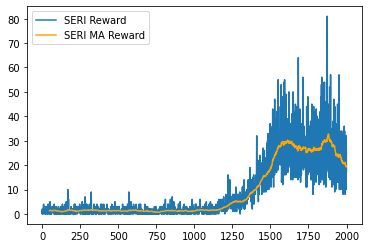

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Reward':  stats.episode_rewards}
df = pd.DataFrame (data)

rolling_mean = df.Reward.rolling(window=50).mean()

plt.plot(df.index, df.Reward, label='SERI Reward')
plt.plot(df.index, rolling_mean, label='SERI MA Reward', color='orange')
plt.legend(loc='upper left')
plt.show()
df.to_csv('output_SERI2.csv', index=False)  